# Using groupby in Pandas
Use this method when you want to collapse a dataframe by a categorical column and run an aggregation. For example, if you had a list of alcohol consumption by country, and you wanted to know the average consumed **for each** continent. Let's look at that example.

#### Load python tools

In [2]:
import pandas as pd

#### Read sample dataset

In [3]:
df = pd.read_csv('https://bit.ly/drinksbycountry')

#### What's that dataframe look like? 

In [4]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


#### How many records, or countries? 

In [5]:
print(f"The number of records in this database are {len(df)}.")

The number of records in this database are 193.


#### How many countries in each continent? 

In [6]:
df.value_counts('continent')

continent
Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
dtype: int64

---

#### What's the average beer servings in all countries? 

In [7]:
print(f"The number of beers consumed by an average person per year around the world is {df['beer_servings'].mean()}.")

The number of beers consumed by an average person per year around the world is 106.16062176165804.


#### But what about **for each** continent? 

In [9]:
df.groupby(['continent'])['beer_servings'].mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

#### You're basically doing this, but **for each** continent

In [32]:
print(f"The number of beers consumed by an average person in Asia per year is {df[df['continent'] == 'Asia']['beer_servings'].mean()}.")

The number of beers consumed by an average person in Asia per year is 37.04545454545455.


#### Or ... 

In [34]:
print(f"The number of beers consumed by an average person in North America per year is {df[df['continent'] == 'North America']['beer_servings'].mean()}.")

The number of beers consumed by an average person in North America per year is 145.43478260869566.


#### Remember, you can filter a dataframe — in this case to see each country in North America:

In [35]:
north_america = df[df['continent'] == 'North America']

In [29]:
df[df['country'] == 'Bahamas']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
11,Bahamas,122,176,51,6.3,North America


In [31]:
df[df['beer_servings'] > 300]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
45,Czech Republic,361,170,134,11.8,Europe
62,Gabon,347,98,59,8.9,Africa
65,Germany,346,117,175,11.3,Europe
81,Ireland,313,118,165,11.4,Europe
98,Lithuania,343,244,56,12.9,Europe
117,Namibia,376,3,1,6.8,Africa
129,Palau,306,63,23,6.9,Oceania
135,Poland,343,215,56,10.9,Europe
188,Venezuela,333,100,3,7.7,South America


#### Which countries consume the most beer? 

In [38]:
north_america.sort_values('beer_servings',ascending=False).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
130,Panama,285,104,18,7.2,North America
17,Belize,263,114,8,6.8,North America
184,USA,249,158,84,8.7,North America
32,Canada,240,122,100,8.2,North America
109,Mexico,238,68,5,5.5,North America


#### Or total litres of alcohol

In [37]:
north_america.sort_values('total_litres_of_pure_alcohol',ascending=False).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
68,Grenada,199,438,28,11.9,North America
144,St. Lucia,171,315,71,10.1,North America
184,USA,249,158,84,8.7,North America
32,Canada,240,122,100,8.2,North America
143,St. Kitts & Nevis,194,205,32,7.7,North America


---

#### Back to groupby: You can use other aggregation methods, too

In [39]:
#Shows the outliers in all the continents; one country in the continent that drinks the most amount of beers.
df.groupby(['continent'])['beer_servings'].max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [40]:
#Shows the outliers in all the continents; one country in the continent that drinks the least amount of beers.
df.groupby(['continent'])['beer_servings'].min()

continent
Africa            0
Asia              0
Europe            0
North America     1
Oceania           0
South America    93
Name: beer_servings, dtype: int64

#### Which country drinks the most beer?

In [42]:
df[df['beer_servings'] == df['beer_servings'].max()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
117,Namibia,376,3,1,6.8,Africa


In [46]:
df[df['continent'] == 'Asia'].sort_values('total_litres_of_pure_alcohol',ascending=False).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
141,Russian Federation,247,326,73,11.5,Asia
138,South Korea,140,16,9,9.8,Asia
85,Japan,77,202,16,7.0,Asia
87,Kazakhstan,124,246,12,6.8,Asia
169,Thailand,99,258,1,6.4,Asia


In [45]:
df[df['total_litres_of_pure_alcohol'] == df['total_litres_of_pure_alcohol'].max()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,Belarus,142,373,42,14.4,Europe


#### Spirits?

In [47]:
df[df['spirit_servings'] == df['spirit_servings'].max()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
68,Grenada,199,438,28,11.9,North America


---

#### There's another method allowing more agg types

In [52]:
df.groupby(['continent'])['beer_servings'].agg(['min','max','count','mean']).reset_index()

,continent,min,max,count,mean
0,Africa,0,376,53,61.471698
1,Asia,0,247,44,37.045455
2,Europe,0,361,45,193.777778
3,North America,1,285,23,145.434783
4,Oceania,0,306,16,89.687500
5,South America,93,333,12,175.083333


#### You can also stick to one aggregation method but use if for all your numerical columns


In [53]:
df.groupby(['continent']).agg(['min','max','count','mean']).reset_index()

continent beer_servings                        spirit_servings       \
                           min  max count        mean             min  max   
0         Africa             0  376    53   61.471698               0  152   
1           Asia             0  247    44   37.045455               0  326   
2         Europe             0  361    45  193.777778               0  373   
3  North America             1  285    23  145.434783              68  438   
4        Oceania             0  306    16   89.687500               0  254   
5  South America            93  333    12  175.083333              25  302   

                    wine_servings                         \
  count        mean           min  max count        mean   
0    53   16.339623             0  233    53   16.264151   
1    44   60.840909             0  123    44    9.068182   
2    45  132.555556             0  370    45  142.222222   
3    23  165.739130             1  100    23   24.521739   
4    16   58.437500             0  212    16   35.625000   
5    12  114.750000             1  221    12   62.416667   

  total_litres_of_pure_alcohol                        
                           min   max count      mean  
0                          0.0   9.1    53  3.007547  
1                          0.0  11.5    44  2.170455  
2                          0.0  14.4    45  8.617778  
3                          2.2  11.9    23  5.995652  
4                          0.0  10.4    16  3.381250  
5                          3.8   8.3    12  6.308333

In [54]:
df.groupby(['continent']).mean().reset_index()

,continent,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Africa,61.471698,16.339623,16.264151,3.007547
1,Asia,37.045455,60.840909,9.068182,2.170455
2,Europe,193.777778,132.555556,142.222222,8.617778
3,North America,145.434783,165.739130,24.521739,5.995652
4,Oceania,89.687500,58.437500,35.625000,3.381250
5,South America,175.083333,114.750000,62.416667,6.308333


#### You can define a groupby as a variable, if you want

In [64]:
all_drinks = df.groupby(['continent']).mean()

#### Assign that to a variable

In [65]:
all_drinks_more_data = df.groupby(['continent']).agg(['min','max','count','mean']).reset_index()

#### And even plot it if you want

<AxesSubplot:xlabel='Number of servings of alcohol', ylabel='Continents'>

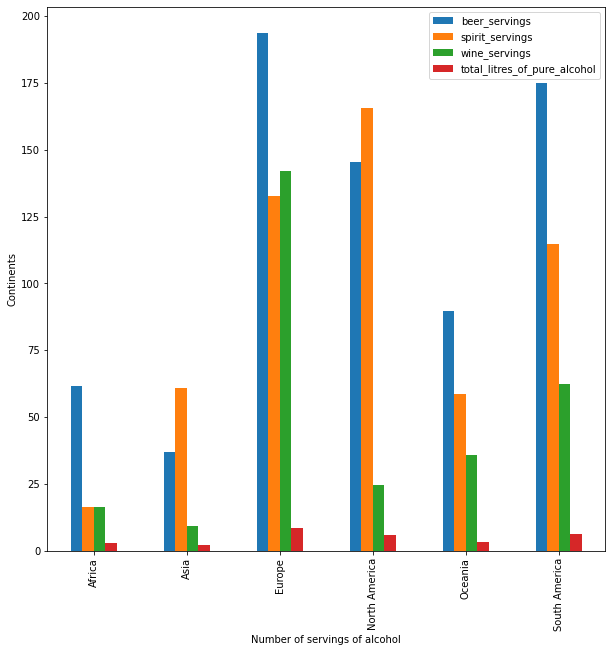

In [72]:
all_drinks.plot(kind = 'bar', figsize = (10,10), ylabel = 'Continents', xlabel = 'Number of servings of alcohol')

<AxesSubplot:ylabel='Continents'>

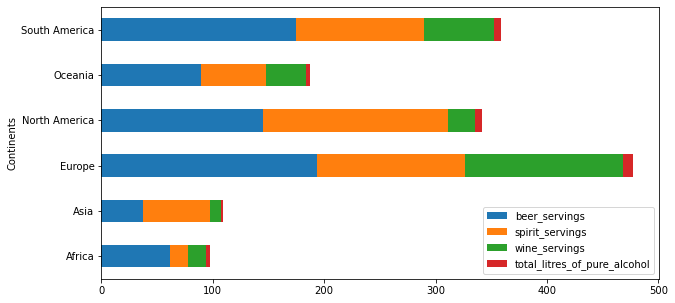

In [75]:
all_drinks.plot(kind = 'barh', stacked=True, figsize = (10,5), xlabel = 'Continents', ylabel = 'Number of servings of alcohol')